In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from astropy.io import fits
import sys
from helita.io import lp
import pickle
from scipy.io.idl import readsav
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset
import matplotlib.colors as colors
import h5py

In [2]:
dpath = '/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/'
dpath_area = '/mn/stornext/d9/souvikb/K_means_results/savefiles/'
dpath_cluster_fits= '/mn/stornext/d9/souvikb/K_means_results/'
dpath_timesteps ='/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/calib_tseries/'
dpath_npz = '/mn/stornext/d9/souvikb/K_means_results/'

In [3]:
cluster_mask = fits.getdata(dpath_cluster_fits+'clusters_mask.fits',ext=0)# Reading the Cluster mask time series
hdrH_im =lp.getheader(dpath+'crispex_6563_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
hdrH_sp = lp.getheader(dpath+'crispex_6563_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris_sp.icube')
dimH_im = hdrH_im[0]
dimH_sp = hdrH_sp[0]
cubeH = lp.getdata(dpath+'crispex_6563_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
cubeH = np.reshape(cubeH,[dimH_im[0],dimH_im[1],dimH_sp[1],dimH_sp[0]])
time_sst = readsav(dpath_timesteps+'tseries_3950_2017-05-25T09:12:00_scans=0-424_calib.sav')
time_sst=time_sst['time']
hdr_Mag = lp.getheader(dpath+'Blos_6302_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
dim_Mag = hdr_Mag[0]
cube_Mag = lp.getdata(dpath+'Blos_6302_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
cube_Mag = np.reshape(cube_Mag,[dim_Mag[0],dim_Mag[1],dim_Mag[2]])
cube_Mag=np.swapaxes(cube_Mag,0,1)
h_alpha=np.swapaxes(cubeH,0,1)

hdrCa_im = lp.getheader(dpath+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris.fcube')
hdrCa_sp = lp.getheader(dpath+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris_sp.fcube')
dimCa_im = hdrCa_im[0]#Image dimensions.
dimCa_sp = hdrCa_sp[0]#La Palma SP cube dimensions.
cubeCa = lp.getdata(dpath+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris.fcube')
cubeCa = np.reshape(cubeCa,[dimCa_im[0],dimCa_im[1],dimCa_sp[1],dimCa_sp[0]])
Ca_k = np.swapaxes(cubeCa,0,1)

In [4]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [56]:
image = np.transpose(cluster_mask[:,:,262]) ##---- Change this to the image-----###
rbeim = np.full(image.shape,-1)
rreim = np.full(image.shape,-1)
restim = np.full(image.shape,-1)

rbe = np.array([5,11,49, 25, 12, 48,])
rre = np.array([16, 8, 36, 26, 46, 18,])
rest = np.array([0,1,2,3,4,6,7,9,10,13,14,15,17,19,20,21,22,23,24,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,47])
rbe_cn = np.zeros(rbe.size,dtype='int32')
rre_cn = np.zeros(rre.size,dtype='int32')
rest_cn = np.zeros(rest.size,dtype='int32')

In [151]:
for ii in range(rbe.size):
    ss = (image[:,:] == rbe[ii])
    rbeim[ss] = ii
    rbe_cn[ii]=ii

for ii in range(rre.size):
    ss = (image[:,:] == rre[ii])
    rreim[ss] = ii+rbe.size
    rre_cn[ii]=ii+rbe.size

for ii in range(rest.size):
    ss = (image[:,:] == rest[ii])
    restim[ss] = ii+rbe.size+rre.size
    rest_cn[ii]=ii+rbe.size+rre.size

##------------- Modifying as per Jayant's suggestion------------##

cmap = plt.get_cmap('Greys')
cmap1 = truncate_colormap(cmap, 0.0, 0.6)

cmap = plt.get_cmap('Blues')
cmap2 = truncate_colormap(cmap, 0.5, 1.)

cmap = plt.get_cmap('Reds')
cmap3 = truncate_colormap(cmap, 0.5, 1.)

cmaplist1 = [cmap1(i) for i in range(cmap1.N)]
cmaplist2 = [cmap2(i) for i in range(cmap2.N)]
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]

# create the new map
cmap1 = colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist1, cmap1.N)
cmap2 = colors.LinearSegmentedColormap.from_list('Custom cmap1', cmaplist2, cmap2.N)
cmap3 = colors.LinearSegmentedColormap.from_list('Custom cmap2', cmaplist3, cmap3.N)

# define the bins and normalize
bounds1 = np.linspace(12, 50, 38)
norm1 = colors.BoundaryNorm(bounds1, cmap1.N)
bounds2 = np.linspace(0, 6, 6)
norm2 = colors.BoundaryNorm(bounds2, cmap2.N)
bounds3 = np.linspace(6, 12, 6)
norm3 = colors.BoundaryNorm(bounds3, cmap3.N)

mrbeim = np.ma.masked_where(rbeim < 0, rbeim)
mrreim = np.ma.masked_where(rreim < 0, rreim)
mrestim = np.ma.masked_where(restim < 0, restim)

In [154]:
cmap1(1)

(0.9992835334825972, 0.9992835334825972, 0.9992835334825972, 1.0)

In [92]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"
    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap
mycmap = transparent_cmap(plt.cm.jet)

In [81]:
mean_abs_mag=np.mean(np.abs(cube_Mag),axis=2)
mask = mean_abs_mag*0
mask[np.where(mean_abs_mag>=100)]=1.

In [90]:
Rbe_combined = h5py.File(dpath_cluster_fits+'RBE_map_combined.hdf5','r')
Rbe_map = np.array(Rbe_combined['rbes'])

Rre_combined = h5py.File(dpath_cluster_fits+'RRE_map_combined.hdf5','r')
Rre_map = np.array(Rre_combined['rres'])

/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


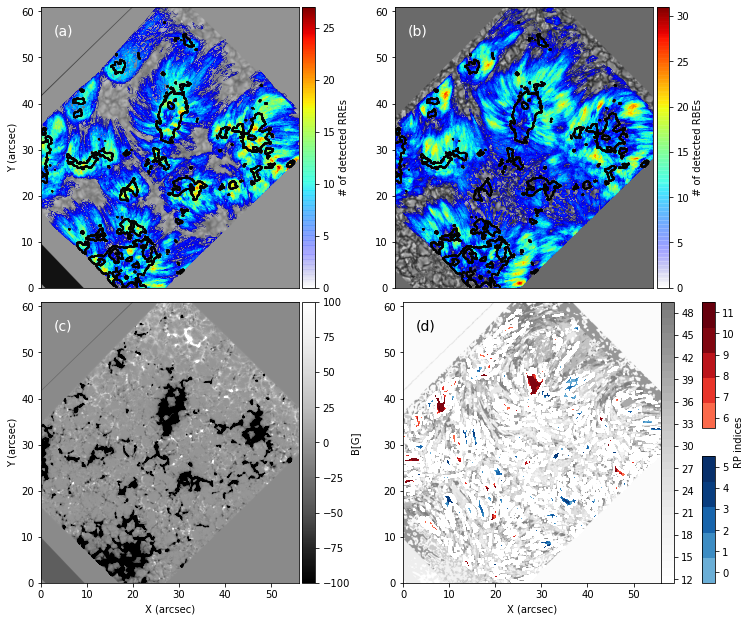

In [167]:
fig, axs =plt.subplots(2,2,figsize=(12,10),facecolor='w', edgecolor='k',constrained_layout=True)
fig.subplots_adjust(hspace = 0.05,wspace=0.05,left=0.1,right=0.9,top=0.9,bottom=0.1)
axs=axs.ravel()
axs[0].imshow(h_alpha[:,:,262,31],origin='lower',cmap='Greys_r',extent=[0,56,0,61])
axs[0].text(.05, .9, '(a)', transform=axs[0].transAxes, fontsize=14,color='white')
axs[0].xaxis.set_visible(False)
axs[0].set_ylabel('Y (arcsec)')
imc2=axs[0].contourf(Rre_map,origin='lower',cmap=mycmap,levels=1000,extent=[0,56,0,61])
dividerc2 = make_axes_locatable(axs[0])
caxc2 = dividerc2.append_axes('right',size="5%", pad=0.05)
cbar1=plt.colorbar(imc2,cax=caxc2,ticks=[0, 5, 10, 15, 20, 25, 30])
cbar1.set_label('# of detected RREs')
im3=axs[0].contour(mask,cmap='Greys',levels=110,extent=[0,56,0,61])
#ax[0].set_xlabel('X (arcsec)')
#ax[1].yaxis.set_visible(False)   
axs[1].imshow(Ca_k[:,:,262,41],origin='lower',cmap='Greys_r',vmin=3.5e-9,extent=[0,56,0,61])
axs[1].text(.05, .9, '(b)', transform=axs[1].transAxes, fontsize=14,color='white')
axs[1].xaxis.set_visible(False)
#axs[1].yaxis.set_visible(False)
imc1=axs[1].contourf(Rbe_map,origin='lower',cmap=mycmap,levels=1000,extent=[0,56,0,61])
dividerc1 = make_axes_locatable(axs[1])
caxc1 = dividerc1.append_axes("right", size="5%", pad=0.05)
cbar2=plt.colorbar(imc1,cax=caxc1,ticks=[0, 5, 10, 15, 20, 25, 30])
cbar2.set_label('# of detected RBEs')
im3_1=axs[1].contour(mask,cmap='Greys',levels=110,extent=[0,56,0,61])

im=axs[2].imshow(cube_Mag[:,:,262],vmax=100,vmin=-100,origin='lower',cmap='Greys_r',extent=[0,56,0,61])
axs[2].text(.05, .9, '(c)', transform=axs[2].transAxes, fontsize=14,color='white')
axs[2].set_ylabel('Y (arcsec)')
axs[2].set_xlabel('X (arcsec)')
#im3=axs[2].contour(mask,cmap='Greys',levels=110,extent=[0,56,0,61])
divider1 = make_axes_locatable(axs[2])
cax0 = divider1.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(im,cax=cax0)
cbar.set_label('B[G]',labelpad=0.001)
im1 =axs[3].imshow(mrestim.T,origin='lower',cmap=cmap1,norm=norm1,extent=[0,56,0,61])
im2=axs[3].imshow(mrbeim.T,origin='lower',cmap=cmap2,norm=norm2,extent=[0,56,0,61])
im3=axs[3].imshow(mrreim.T,origin='lower',cmap=cmap3,norm=norm3,extent=[0,56,0,61])
axs[3].set_xlabel('X (arcsec)')


axins_cb1 = inset_axes(axs[3],
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1., 0., 1, 1),
                   bbox_transform=axs[3].transAxes,
                   borderpad=0,
                   )

axins_cb2 = inset_axes(axs[3],
                       width="5%",  # width = 5% of parent_bbox width
                       height="45%",  # height : 50%
                       loc='lower left',
                       bbox_to_anchor=(1.16, 0., 1, 1),
                       bbox_transform=axs[3].transAxes,
                       borderpad=0,
                       )

axins_cb3 = inset_axes(axs[3],
                       width="5%",  # width = 5% of parent_bbox width
                       height="45%",  # height : 50%
                       loc='upper left',
                       bbox_to_anchor=(1.16, 0., 1, 1),
                       bbox_transform=axs[3].transAxes,
                       borderpad=0,
                       )
axs[3].text(.05, .9, '(d)', transform=axs[3].transAxes, fontsize=14,color='black')
cbar_1=plt.colorbar(im1,cax=axins_cb1,ticks = np.arange(np.min(rest_cn)+0.5,np.max(rest_cn)+1.5,3),orientation="vertical",format='%1i')
axins_cb1.xaxis.set_ticks_position("default")
cbar_1.set_label('RP indices',labelpad=40)
#cax2 = divider.append_axes("right", size="3%", pad=0.04)
plt.colorbar(im2,cax=axins_cb2,ticks = np.arange(np.min(rbe_cn)+0.5,np.max(rbe_cn)+1.5),orientation="vertical",format='%1i')
axins_cb2.xaxis.set_ticks_position("default")
#axs[3].xaxis.set_visible(False)
#axs[3].yaxis.set_visible(False)   
#cax3 = divider.append_axes("right", size="3%", pad=0.04)
plt.colorbar(im3,cax=axins_cb3,ticks = np.arange(np.min(rre_cn)+0.5,np.max(rre_cn)+1.5),orientation="vertical",format='%1i')
axins_cb3.xaxis.set_ticks_position("default")
#plt.tight_layout()
plt.savefig('/mn/stornext/d9/souvikb/paper4_images/Context_v1_p4.pdf',dpi=300,format='pdf')

In [20]:
contrast =[]
for scan in range(425):
    contrast1= np.std(Ca_k[100:1400,100:1400,scan,41]/np.mean(Ca_k[100:1400,100:1400,scan,41]))
    contrast.append(contrast1)

In [21]:
contrast = np.array(contrast)
np.argmax(contrast)

262

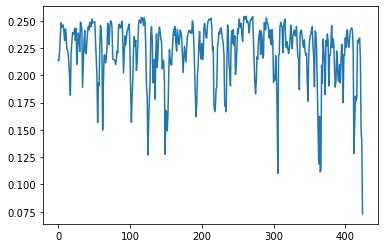

In [24]:
plt.plot(contrast)